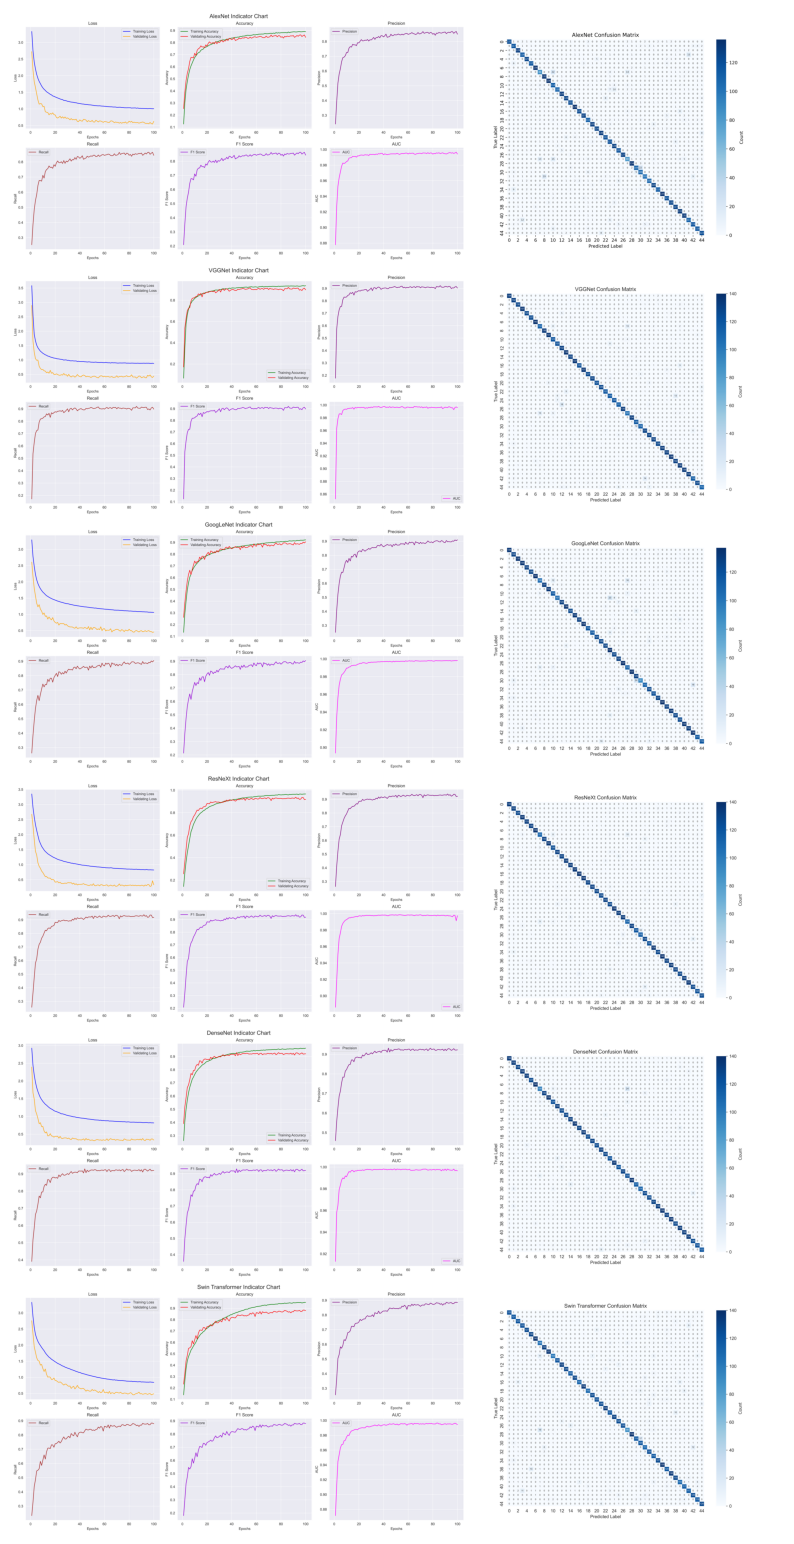

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# 提高 PIL 允许的最大像素限制
Image.MAX_IMAGE_PIXELS = None

# 定义每个网络的图片路径
networks = ['AlexNet', 'VGGNet', 'GoogLeNet', 'ResNeXt', 'DenseNet', 'SwinTransformer']
indicator_paths = [f'../{net}/{net}-Indicator-Chart.png' for net in networks]
confusion_paths = [f'../{net}/{net}_Confusion_Matrix.png' for net in networks]

# 定义拼接后的图片的保存路径
output_path = './Classification_Combined_Images.png'

# 读取所有的图片
indicator_images = [Image.open(path) for path in indicator_paths]
confusion_images = [Image.open(path) for path in confusion_paths]

# 提高fixed_height值以增加分辨率（例如增加到1200）
fixed_height = 1200  # 增加高度，使得图片具有更高的分辨率
indicator_images = [img.resize((int(img.width * (fixed_height / img.height)), fixed_height)) for img in indicator_images]
confusion_images = [img.resize((int(img.width * (fixed_height / img.height)), fixed_height)) for img in confusion_images]

# 拼接图片：每个网络的两张图水平拼接，多个网络的图垂直拼接
combined_rows = [Image.new('RGB', (indicator.width + confusion.width, fixed_height))
                 for indicator, confusion in zip(indicator_images, confusion_images)]

# 将每对图片水平拼接
for combined, indicator, confusion in zip(combined_rows, indicator_images, confusion_images):
    combined.paste(indicator, (0, 0))
    combined.paste(confusion, (indicator.width, 0))

# 将所有的行垂直拼接成一张大图
total_height = sum(row.height for row in combined_rows)
max_width = max(row.width for row in combined_rows)
final_image = Image.new('RGB', (max_width, total_height))

# 把每一行图拼接到最终图中
current_y = 0
for row in combined_rows:
    final_image.paste(row, (0, current_y))
    current_y += row.height

# 保存最终拼接的图片（调整质量以提高文件清晰度）
final_image.save(output_path, quality=95)  # 调整quality参数，95是一个较高的图像质量值

# 显示结果
plt.figure(figsize=(10, 20))
plt.imshow(final_image)
plt.axis('off')
plt.show()
